In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [218]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.linestyle'] = '-'

plt.rcParams['font.family'] = 'Inter'
plt.rcParams['lines.linewidth'] = 1
#plt.rcParams['font.serif'] = 'Ubuntu'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size']        = 10
plt.rcParams['axes.labelsize']   = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']   = 14
plt.rcParams['axes.linewidth']   = 0.7
plt.rcParams['xtick.labelsize']  = 8
plt.rcParams['ytick.labelsize']  = 8
plt.rcParams['figure.titlesize'] = 12
#plt.rcParams['legend.fontsize'] = 10


blanco_100 = "#fcfcfc"
blanco_200 = "#f1f1f3"
gris_300   = "#d5d8dd"
gris_500   = "#8f949e"
negro_700  = "#454a54"
negro_800  = "#2f3541"
negro_900  = "#1e252f"

rojo_clarisimo  = "#f0d0d3"
rojo_claro      = "#dc9ea1"
rojo_primario   = "#be6069"
rojo_oscuro     = "#96545d"
rojo_oscurisimo = "#63454f"

naranja_clarisimo  = "#fcd7ca"
naranja_claro      = "#f8bca5"
naranja_primario   = "#ec926f"
naranja_oscuro     = "#ab7463"
naranja_oscurisimo = "#6a504e"

amarillo_clarisimo  = "#fff3d1"
amarillo_claro      = "#ffe7a3"
amarillo_primario   = "#fbdb65"
amarillo_oscuro     = "#b19c5d"
amarillo_oscurisimo = "#6a624e"

verde_clarisimo  = "#d2e9de"
verde_claro      = "#a4d5be"
verde_primario   = "#76c1a1"
verde_oscuro     = "#5d8e7e"
verde_oscurisimo = "#436564"

azul_clarisimo  = "#d9e6fc"
azul_claro      = "#b7d1fb"
azul_primario   = "#8fbbfa"
azul_oscuro     = "#6b88b3"
azul_oscurisimo = "#4c5d76"

In [236]:
df_esferas_movimiento = pd.read_csv('./csv/CB_esferas_d10_a100_n10_moving.csv')

In [249]:
def crear_grafica(df, filename, save_to_file = False, filepath = "../docs/img/graficas"):
    # df está preparado para haber sido leído desde `afterburner_parser.py`
    width, height = plt.figaspect(0.56)
    plt.figure(figsize=(width,height), dpi=400)

    # remove the right axes
    ax = plt.axes()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # change the ax color
    ax.spines['left'].set_color(negro_700)
    ax.spines['bottom'].set_color(negro_700)

    # get the average of df['Frametime']
    media = round(df['Frametime'].mean(), 2)
    
    plt.title("Cornell Box Esferas (depth = 10, samples = 10)")
    plt.plot(
        df['Frametime'], 
        color=verde_primario, 
        label="Media = " + str(media) + "ms)"
    )

    plt.axhline(y=33, color=rojo_oscurisimo, linestyle='--')
    plt.legend(loc="best")
    plt.xlabel("Tiempo")
    plt.ylabel("Frametime (ms)")
    
    if save_to_file:
        if not os.path.exists(filepath):
            os.mkdir(filepath)
        
        file = os.path.join(filepath, filename) +'.png'
        
        print(f"Guardando en el archivo {file}")
        plt.savefig(file)

    return plt

Guardando en el archivo ../docs/img/graficas\CB_esferas_d10_a100_n10_moving.png


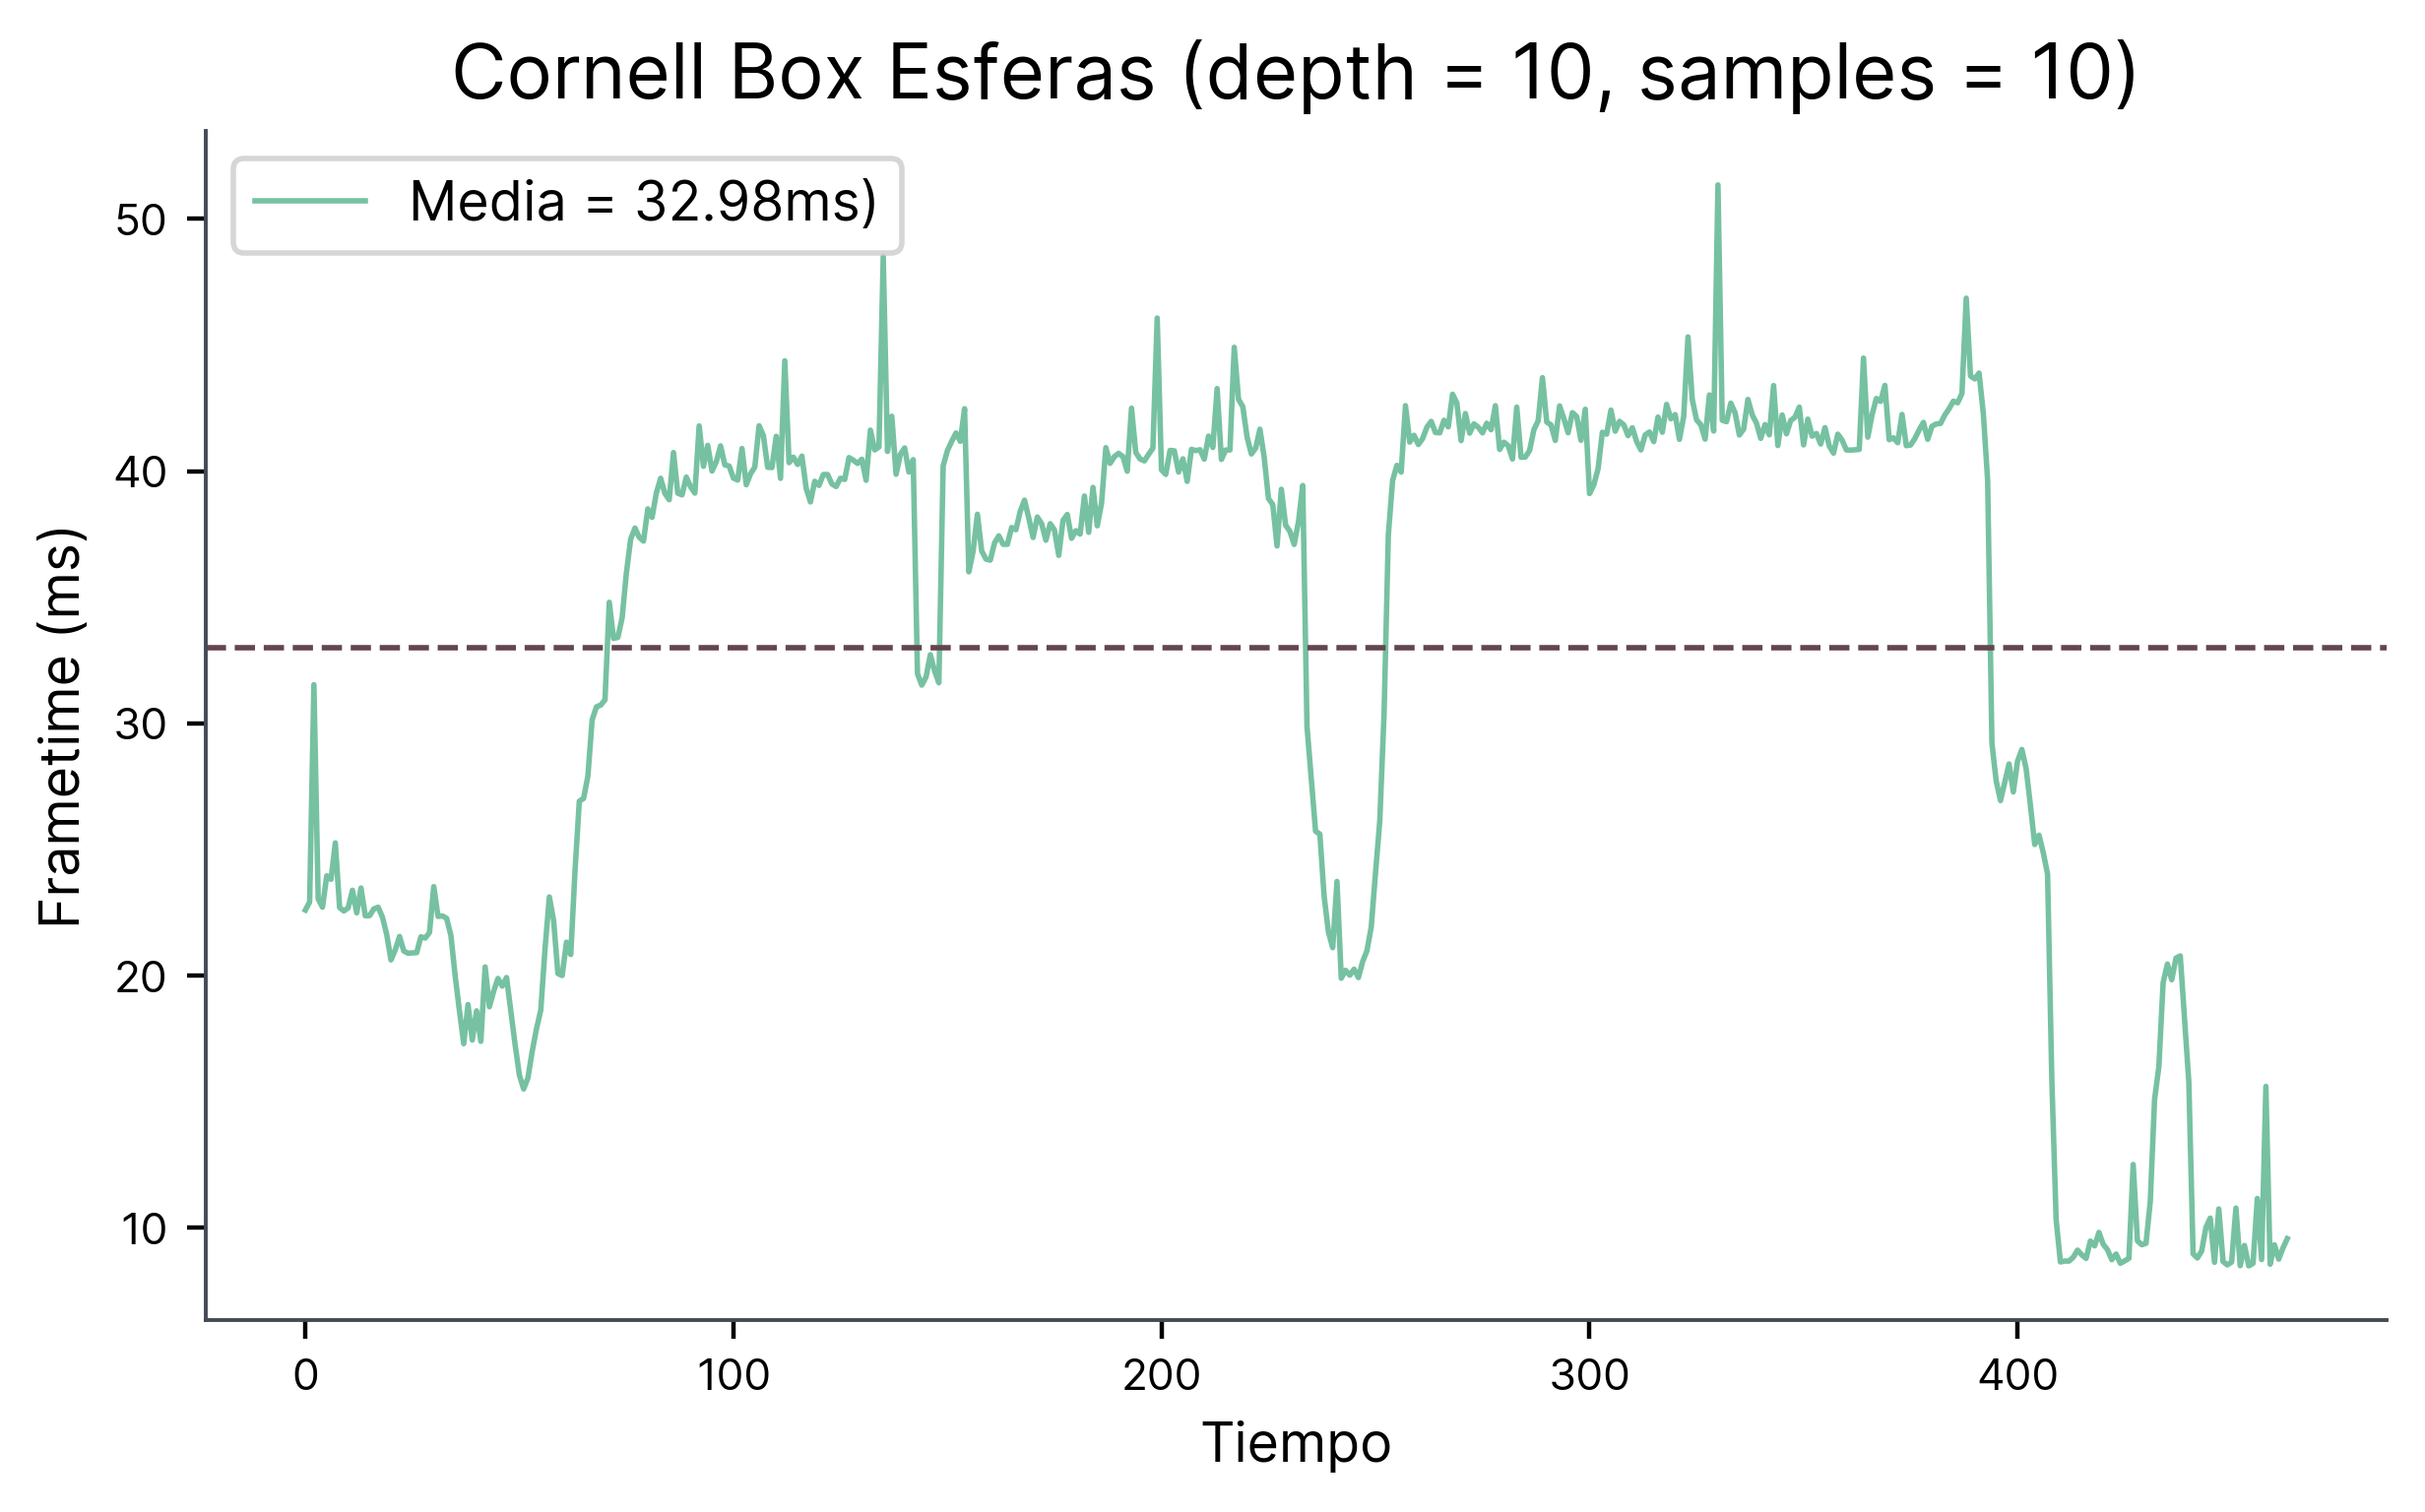

In [250]:
crear_grafica(df_esferas_movimiento, "CB_esferas_d10_a100_n10_moving", True).show()

In [240]:
os.getcwd()

'c:\\Users\\Andre\\Repositorios\\Raytracing\\utilities'